# KPI Decomposition Deep Dive

Break down production, mobilisation, sequencing, and downtime metrics for the minitoy scenario.

In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().resolve()
while PROJECT_ROOT != PROJECT_ROOT.parent and not (PROJECT_ROOT / "pyproject.toml").exists():
    PROJECT_ROOT = PROJECT_ROOT.parent
if not (PROJECT_ROOT / "pyproject.toml").exists():
    raise RuntimeError(
        "Notebook must be executed within a FHOPS checkout (pyproject.toml not found)."
    )
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

import pandas as pd

from docs.examples.analytics import utils
from fhops.evaluation import playback_summary_metrics
from fhops.scenario.io import load_scenario

SCENARIO = PROJECT_ROOT / "examples/minitoy/scenario.yaml"
ASSIGNMENTS = PROJECT_ROOT / "tests/fixtures/playback/minitoy_assignments.csv"
playback_tables = utils.load_deterministic_playback(SCENARIO, ASSIGNMENTS)

## Scenario Overview

In [2]:
scenario = load_scenario(SCENARIO)
summary_metrics = playback_summary_metrics(playback_tables.shift, playback_tables.day)
pd.Series(summary_metrics)

samples                  1.000000
total_production        54.000000
total_hours            210.000000
mobilisation_cost      335.000000
average_utilisation      0.785714
dtype: float64

## Production vs Mobilisation

In [3]:
prod_metrics = playback_tables.day[["day", "production_units", "mobilisation_cost"]]
prod_metrics

,day,production_units,mobilisation_cost
0,1,6.5,0.0
1,2,3.0,0.0
2,3,3.0,0.0
3,4,2.5,0.0
4,5,5.5,65.0
5,6,2.0,0.0
6,7,1.5,70.0
7,8,4.5,65.0
8,9,4.5,0.0
9,10,4.5,0.0


## Sequencing & Downtime

In [4]:
seq_metrics = playback_tables.day[
    ["day", "sequencing_violations", "downtime_hours", "downtime_events"]
]
seq_metrics

,day,sequencing_violations,downtime_hours,downtime_events
0,1,0,0.0,0
1,2,0,0.0,0
2,3,0,0.0,0
3,4,0,0.0,0
4,5,0,0.0,0
5,6,0,0.0,0
6,7,0,0.0,0
7,8,0,0.0,0
8,9,0,0.0,0
9,10,0,0.0,0


## Visualise Utilisation

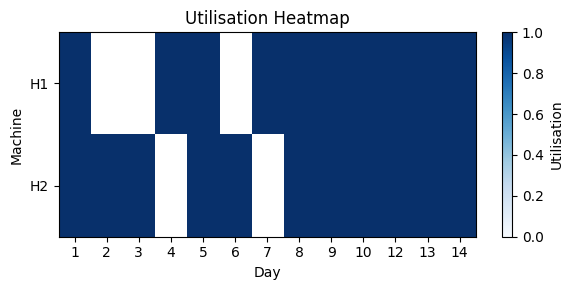

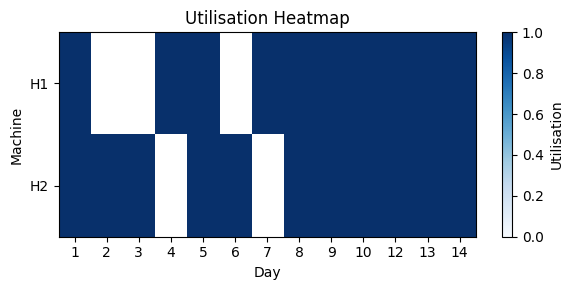

In [5]:
chart = utils.plot_utilisation_heatmap(playback_tables.shift)
chart